In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [0]:
#중요도 그래프
def plot_feature_importance_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature')
  plt.ylim(-1, n_features)

In [0]:
# GradientBoostig 알고리즘 실습
# depth는 3,
# 트리 100개(n_estimators)
# 학습률 : 0.1을 사용

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
print("훈련 세트 정확도: {:.2f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.97


In [0]:
# 위는 overfitting 이다.

In [0]:
# 02. 훈련세트에 대한 과적합을 줄이기
# max_depth 조절.
# learning_rate 조절.

In [0]:
## tree depth의 조절

In [11]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 셋 정확도: {:.2f}".format(gbrt.score(X_train, y_train)))
print("테스트 셋 정확도: {:.2f}".format(gbrt.score(X_test, y_test)))

훈련 셋 정확도: 0.99
테스트 셋 정확도: 0.97


In [0]:
# 트리의 학습률(learning_rate) 조절

In [13]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 셋 정확도: {:.2f}".format(gbrt.score(X_train, y_train)))
print("테스트 셋 정확도: {:.2f}".format(gbrt.score(X_test, y_test)))

훈련 셋 정확도: 0.99
테스트 셋 정확도: 0.97


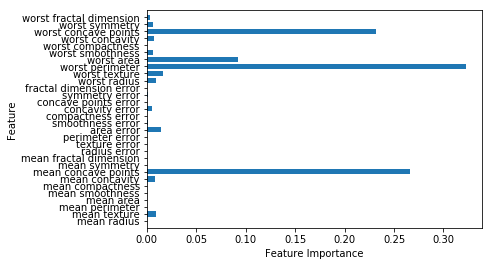

In [14]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importance_cancer(gbrt)

In [0]:
# 모델의 장단점
# 단점 :
# 매개변수를 잘 조정해야 하며, 훈련 시간이 길다.
# 트리 모델 특성 상 희소한 고차원 데이터에는 잘 동작하지 않는다.
# 장점 :
# feature의 scale(범위, 값)을 조정하지 않아도 이진특성이 연속적인 특성에서 잘 동작
# feature 의 스케일을 조정하지 않아도 된다.

In [0]:
# 매개변수
# 이전트리의 오차를 보정하는 정도 조절 : learning_rate
# learning_rate를 낮추면 =>> 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야 한다.
# n_estimator가 클수록 좋다.(랜덤포레스트)
# n_estimator가 크면 그래디언트 부스팅은 과적합의 가능성이 있음.

# 트리의 복잡도를 낮추는 max_depth (또는 max_leaf_nodes)
# 보통 부스팅 모델에서 max_depth를 매우작게 설정하며 트리의 깊이가 5보다 깊어지지 않도록 한다.
# n_estimators를 맞춘 이후에 learning_rate를 찾는다.